In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import h5py 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
filename = "/content/drive/MyDrive/TFM/photon_alt5200m_qgsii_fluka_r560m.h5"

f = h5py.File(filename,'r')

#Read input data for algorithm
group = f["data"]



In [4]:
#Read shower parameters
InfoDF = pd.read_hdf(filename, key = "info")
ID_showers = InfoDF.iloc[:,0].values
E0_train = InfoDF.iloc[:,1].values
theta0_train = InfoDF.iloc[:,2].values
Nmuons_train = InfoDF.iloc[:,3].values


In [5]:
InfoDF

,ID_shower,E0,theta0,Nmuons,Y_class
0,2825.0,31729.250000,0.0,22.0,2.0
1,2826.0,27119.029297,0.0,19.0,2.0
2,2827.0,33670.718750,0.0,18.0,2.0
3,2828.0,26095.900391,0.0,20.0,2.0
4,2829.0,32010.259766,0.0,20.0,2.0
...,...,...,...,...,...
0,25435.0,842.409973,0.0,0.0,2.0
1,25436.0,989.150024,0.0,2.0,2.0
2,25437.0,959.369995,0.0,0.0,2.0
3,25438.0,637.979980,0.0,0.0,2.0


In [6]:
Yclass_train = InfoDF.iloc[:,4].values

In [10]:
Yclass_train

array([2., 2., 2., ..., 2., 2., 2.])

In [11]:
#Read input for the algorithm
#X_train: channel1 -> e.m. energy, channel2 -> particles, channel3 -> muons
X_train = group[()]
Y_train = InfoDF.iloc[:,-1].values

#Close file
f.close()

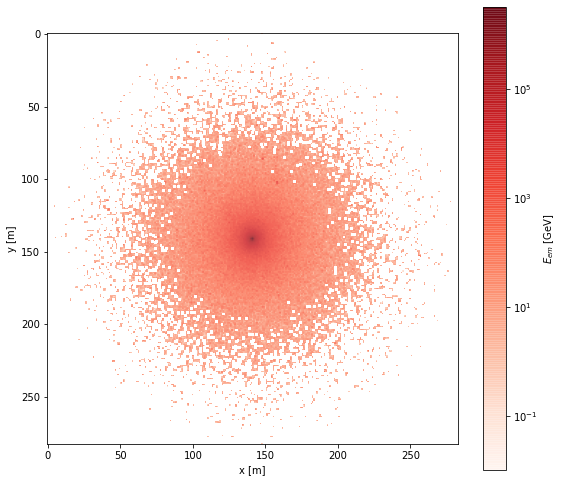

In [16]:
index_to_use = np.where(E0_train>90000)[0][0]
label = "$E_{em}$ [GeV]"


index_to_use = np.where(E0_train>50000)[0][1]
#Plot to see matrix with colors
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
#plt.imshow(X_train[index_to_use,:,:,0], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
plt.imshow(X_train[index_to_use,:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.set_ylabel(label, rotation=90)
plt.autoscale(enable=True)
#plt.title(str(particle)+" shower. $E_0 =$ "+str(np.round((10**-3)*E0_train[index_to_use],2))+" TeV")
plt.xlabel("x [m]")
#plt.xticks(ticks = np.linspace(0,X_train.shape[1]-1,8), labels=np.linspace(-size,size,8).astype(int))
plt.ylabel('y [m]')
#plt.yticks(ticks = np.linspace(0,X_train.shape[2]-1,8), labels=-1*np.linspace(-size,size,8).astype(int))
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)
fig.tight_layout()
#filename = './figs/'+str(primary)+'_id'+str(index_to_use)+'.pdf'
#plt.savefig(filename)
#plt.close()